# Environment Setup

In [ ]:
import os
from google.colab import userdata

os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")

In [ ]:
!nvidia-smi

Mon Jul 28 13:04:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Installation of Dependencies and Libraries

In [ ]:
!pip install -q rfdetr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AEQItibgYp6CszB4A1wr")
project = rf.workspace("purin-rcwo6").project("aquarium-ea5ve-xraxm")
version = project.version(9)
dataset = version.download("coco")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aquarium-9 in coco:: 100%|██████████| 900/900 [00:00<00:00, 3745.69it/s]


In [ ]:
dataset.location

'/content/Aquarium-9'

# Training RF-DETR on Custom Dataset

In [ ]:
from rfdetr import RFDETRBase

model = RFDETRBase()
history = []

def callback2(data):
  history.append(data)

model.callbacks["on_fit_epoch_end"].append(callback2)

model.train(dataset_dir=dataset.location, epochs=20, batch_size=4, grad_accum_steps=4, lr=1e-4)

rf-detr-base.pth: 100%|██████████| 355M/355M [00:05<00:00, 72.6MiB/s]


Loading pretrain weights


reinitializing your detection head with 8 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=8, grad_accum_steps=4, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=4, weight_decay=0.0001, epochs=20, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-base.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[2, 5, 8, 11], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim=256, sa_nheads=8, ca_nheads=1

Epoch: [0]  [ 0/31]  eta: 0:06:16  lr: 0.000100  class_error: 89.74  loss: 12.3594 (12.3594)  loss_ce: 0.7122 (0.7122)  loss_bbox: 0.7835 (0.7835)  loss_giou: 1.3086 (1.3086)  loss_ce_0: 0.6542 (0.6542)  loss_bbox_0: 1.1169 (1.1169)  loss_giou_0: 1.4937 (1.4937)  loss_ce_1: 0.7066 (0.7066)  loss_bbox_1: 0.8135 (0.8135)  loss_giou_1: 1.3462 (1.3462)  loss_ce_enc: 0.6368 (0.6368)  loss_bbox_enc: 1.2235 (1.2235)  loss_giou_enc: 1.5635 (1.5635)  loss_ce_unscaled: 0.7122 (0.7122)  class_error_unscaled: 89.7436 (89.7436)  loss_bbox_unscaled: 0.1567 (0.1567)  loss_giou_unscaled: 0.6543 (0.6543)  cardinality_error_unscaled: 3650.2500 (3650.2500)  loss_ce_0_unscaled: 0.6542 (0.6542)  loss_bbox_0_unscaled: 0.2234 (0.2234)  loss_giou_0_unscaled: 0.7469 (0.7469)  cardinality_error_0_unscaled: 3736.2500 (3736.2500)  loss_ce_1_unscaled: 0.7066 (0.7066)  loss_bbox_1_unscaled: 0.1627 (0.1627)  loss_giou_1_unscaled: 0.6731 (0.6731)  cardinality_error_1_unscaled: 3888.2500 (3888.2500)  loss_ce_enc_unsca

In [ ]:
model

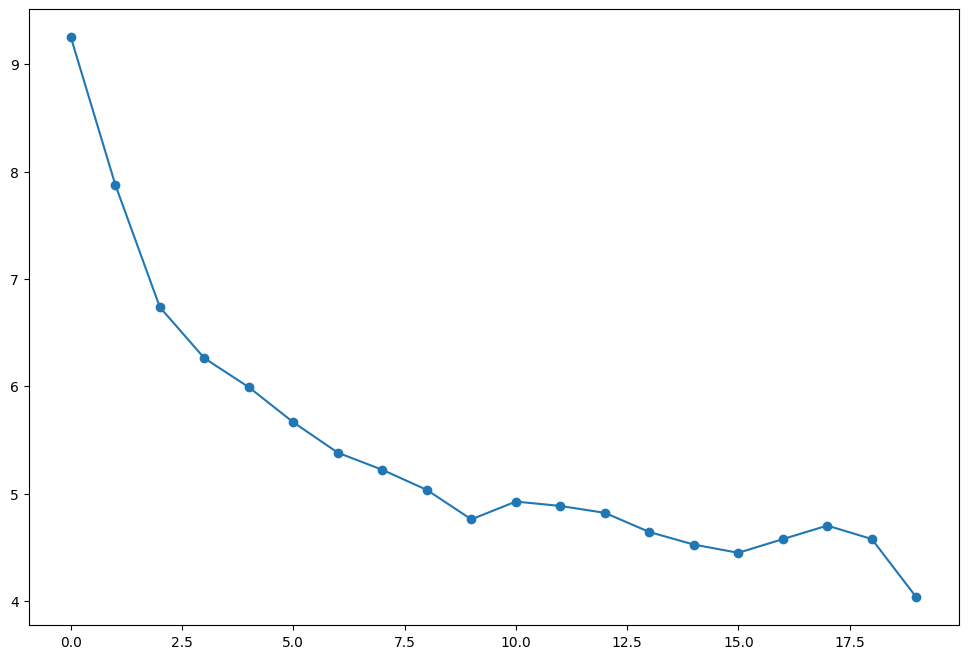

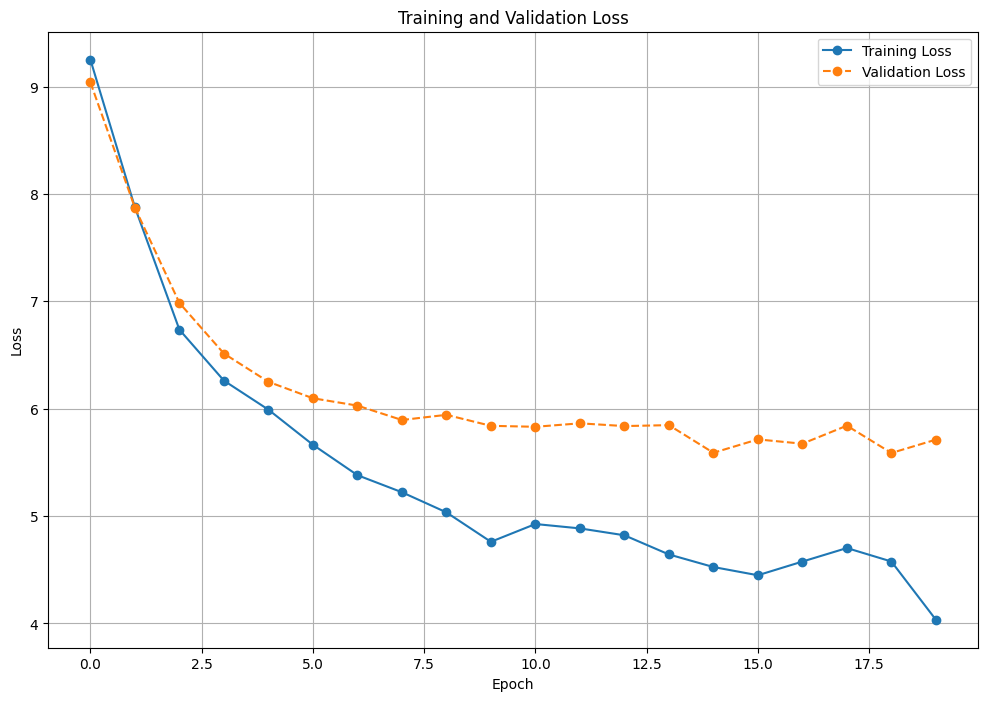

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(history)
plt.figure(figsize=(12, 8))

plt.plot(
    df['epoch'],
    df['train_loss'],
    label='Training Loss',
    marker='o',
    linestyle='-'
)

plt.plot(
    df['epoch'],
    df['val_loss'],
    label='Validation Loss',
    marker='o',
    linestyle='--'
)


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.show()

# Result

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(history)

df['avg_precision'] = df['test_ema_AP']
df['avg_recall'] = df['test_ema_AR_100']

plt.figure(figsize=(12, 8))
plt.plot(
    df['epoch'],
    df['avg_precision'],
    label='Average Precision',
    marker='o',
    linestyle='-'
)

plt.title('Average Precision')
plt.xlabel('Epoch')
plt.ylabel('Average Precision')
plt.legend()
plt.grid(True)

plt.show()

plt.figure(figsize=(12, 8))
plt.plot(
    df['epoch'],
    df['avg_recall'],
    label='Average Recall',
    marker='o',
    linestyle='-'
)

plt.title('Average Recall')
plt.xlabel('Epoch')
plt.ylabel('Average Recall')
plt.legend()
plt.grid(True)

plt.show()

KeyError: 'test_ema_AP'

# Run Inference with Model

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"{dataset.location}/test",
    annotations_path=f"{dataset.location}/test/_annotations.coco.json"
)

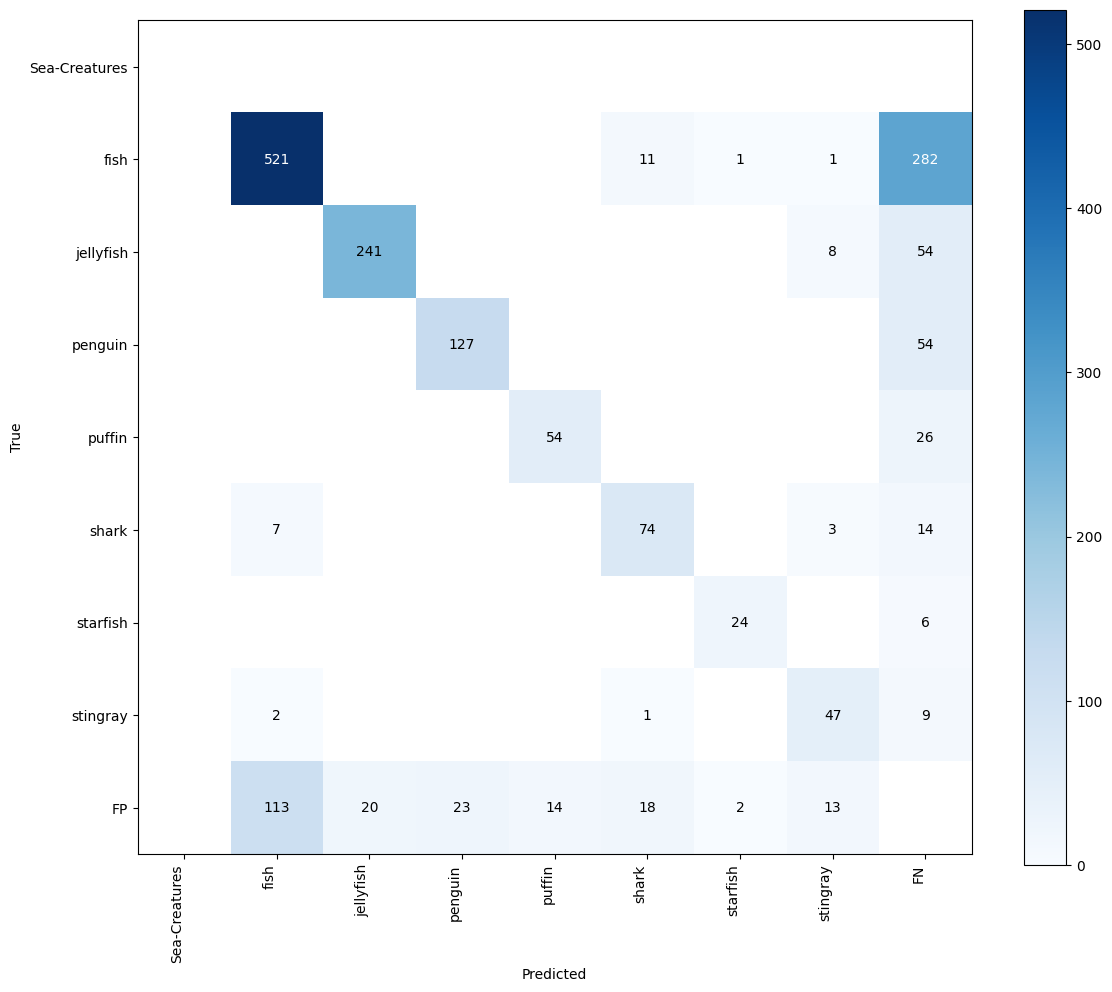

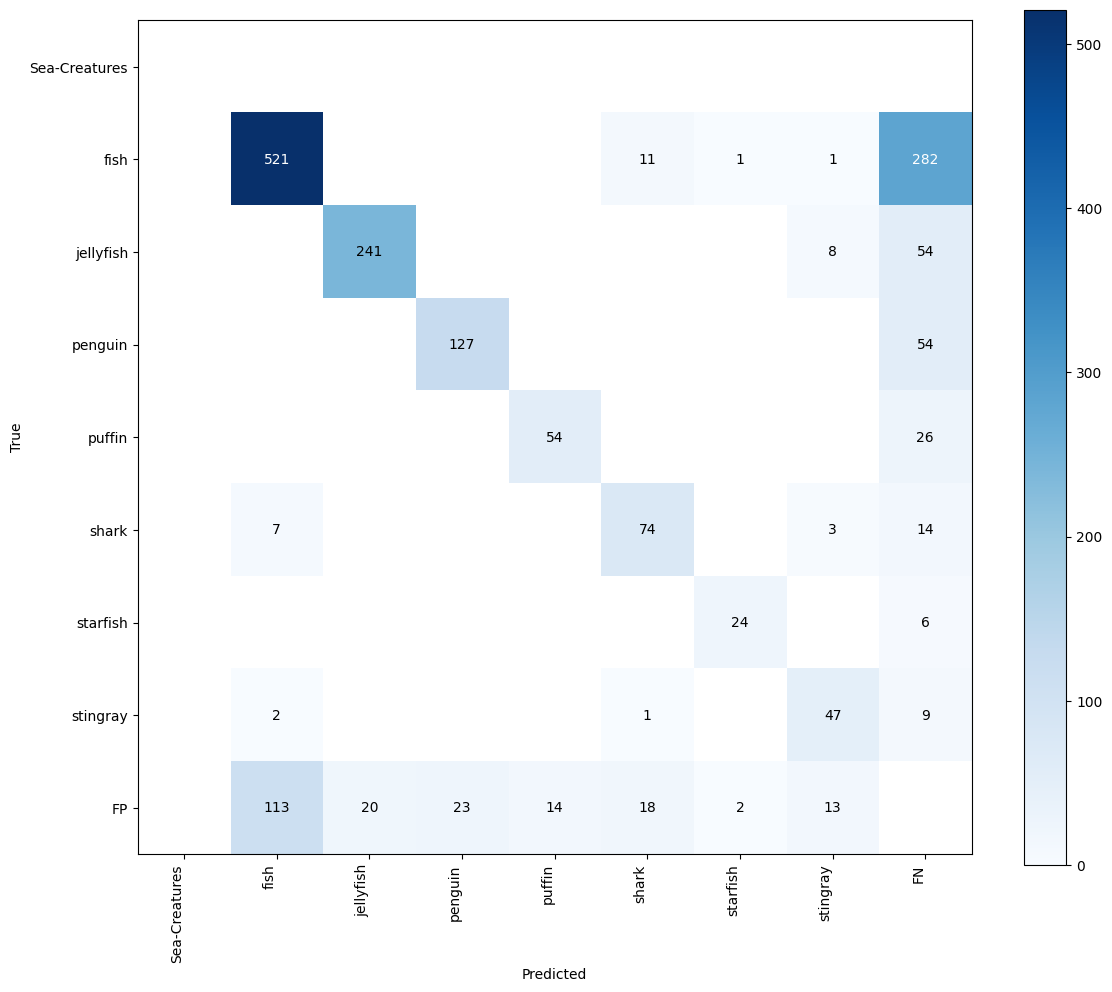

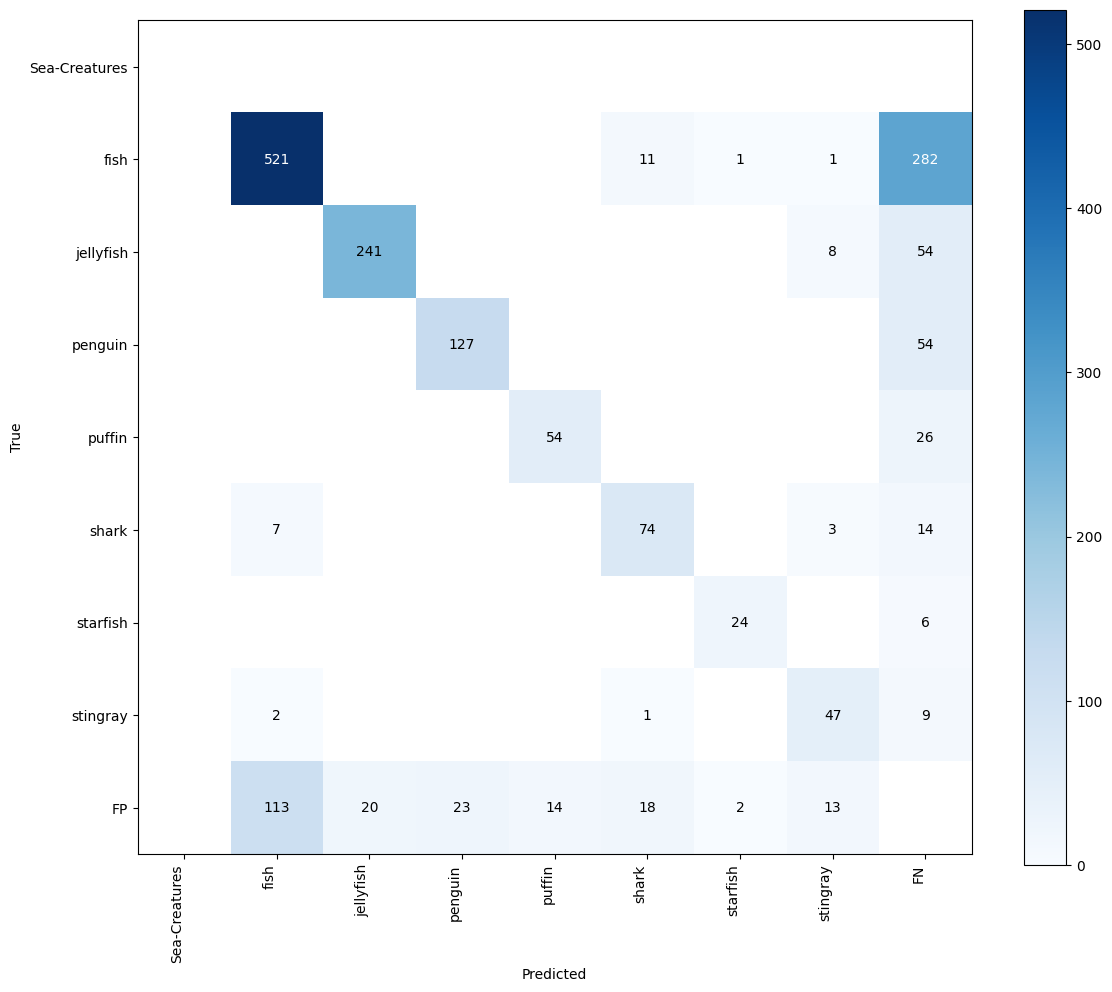

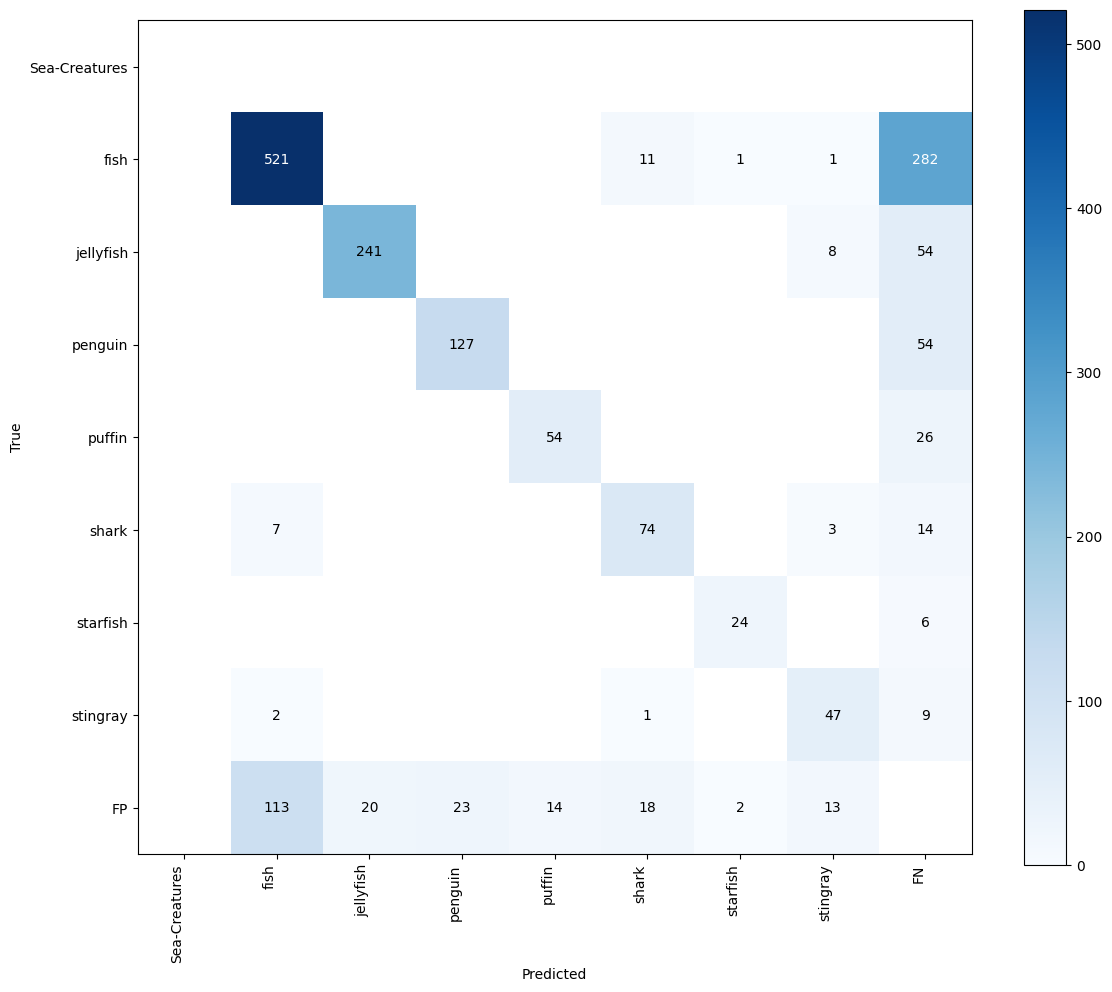

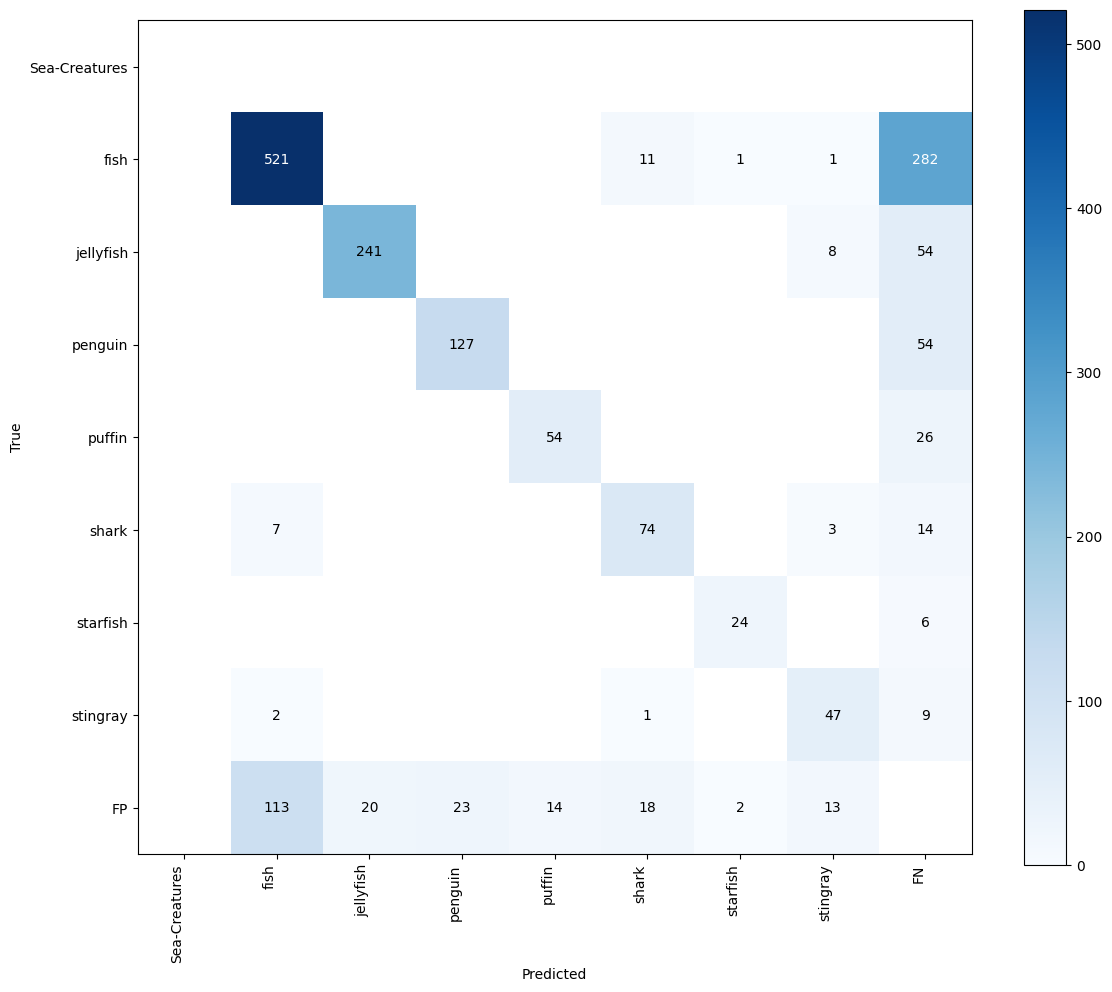

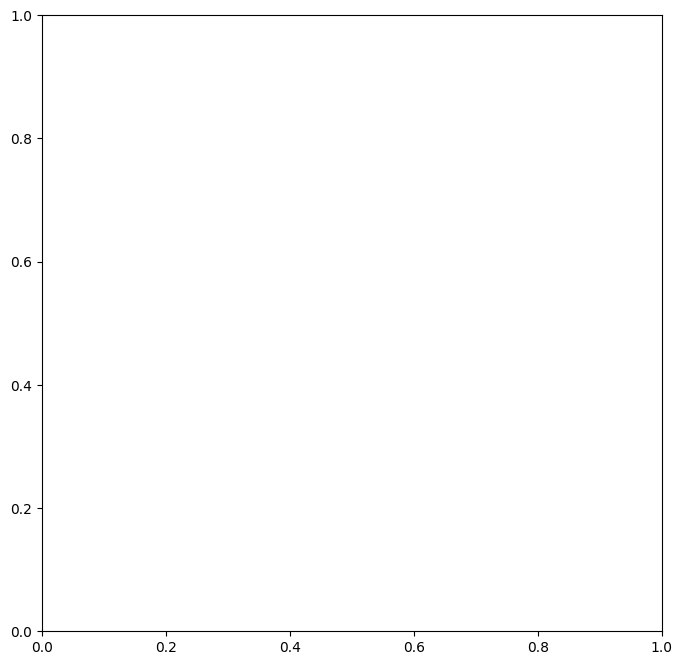

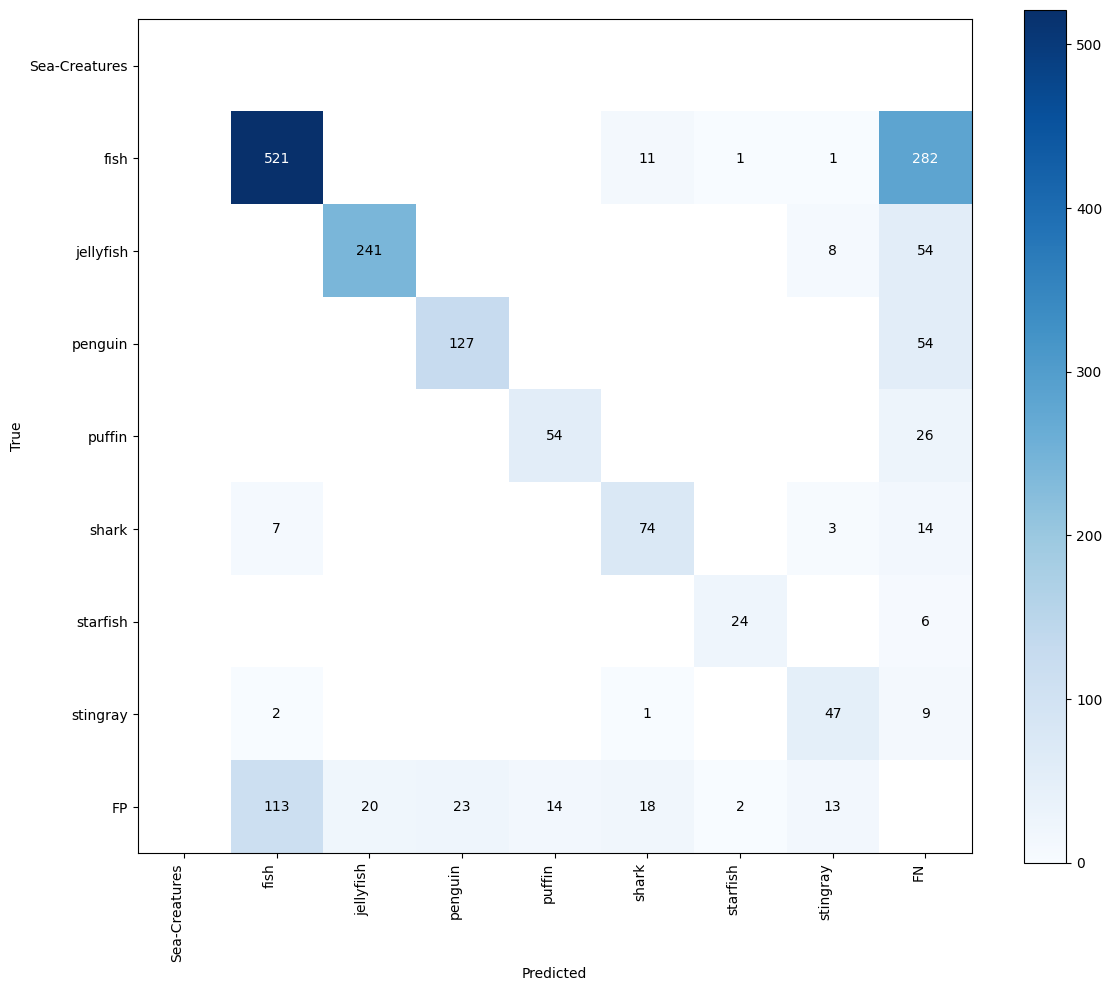

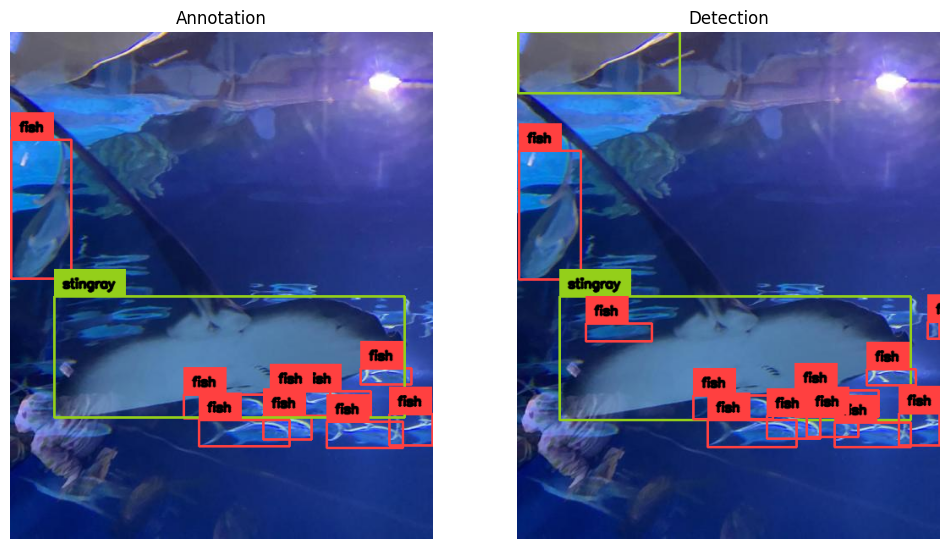

In [ ]:
from rfdetr import RFDETRBase
import supervision as sv
from PIL import Image

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"{dataset.location}/test",
    annotations_path=f"{dataset.location}/test/_annotations.coco.json"
)

path, image, annotations = ds[0]
image = Image.open(path)

detections = model.predict(image, threshold=0.5)

text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

bbox_annotator = sv.BoxAnnotator(thickness=thickness)
label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.BLACK,
    text_scale=text_scale,
    text_thickness=thickness
)

annotatios_labels = [
    f"{ds.classes[class_id]}"
    for class_id
    in annotations.class_id
]

detections_labels = [
    f"{ds.classes[class_id]}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotation_image = image.copy()
annotation_image = bbox_annotator.annotate(
    annotation_image, annotations
)
annotation_image = label_annotator.annotate(
    annotation_image, annotations, annotatios_labels
)

detection_image = image.copy()
detection_image = bbox_annotator.annotate(
    detection_image, detections
)
detection_image = label_annotator.annotate(
    detection_image, detections, detections_labels
)

sv.plot_images_grid(images=[annotation_image, detection_image], grid_size=(1, 2), titles=["Annotation", "Detection"])

Evaluate Model

In [ ]:
import supervision as sv
from tqdm import tqdm
from supervision.metrics import MeanAveragePrecision

targets = []
predictions = []

for path, image, annotations in tqdm(ds):
  image = Image.open(path)
  detections = model.predict(image, threshold=0.5)

  targets.append(annotations)
  predictions.append(detections)

100%|██████████| 191/191 [00:09<00:00, 20.67it/s]


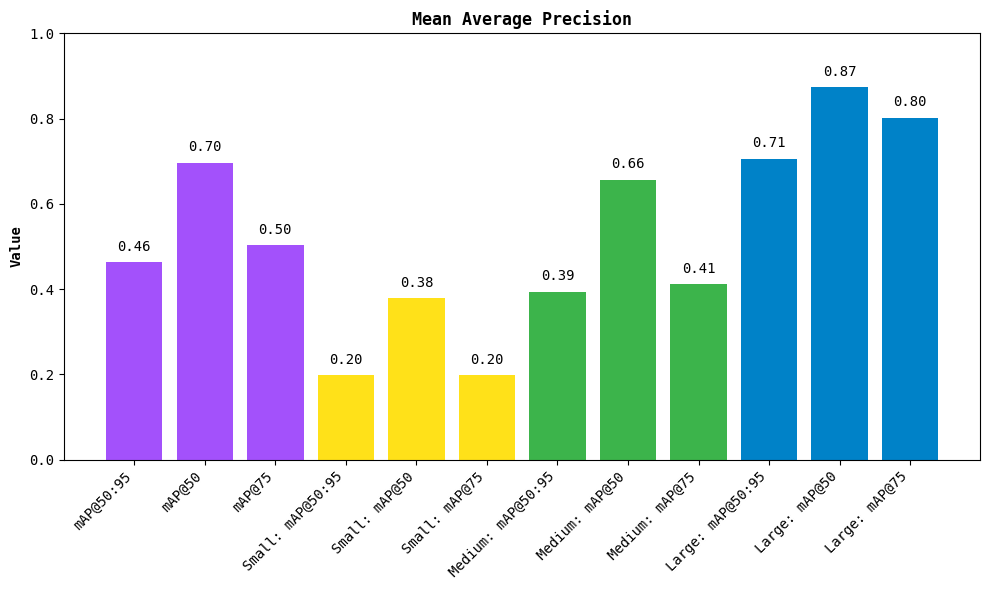

In [ ]:
map_metric = MeanAveragePrecision()
map_result = map_metric.update(predictions, targets).compute()

map_result.plot()

# Confusion Matrix

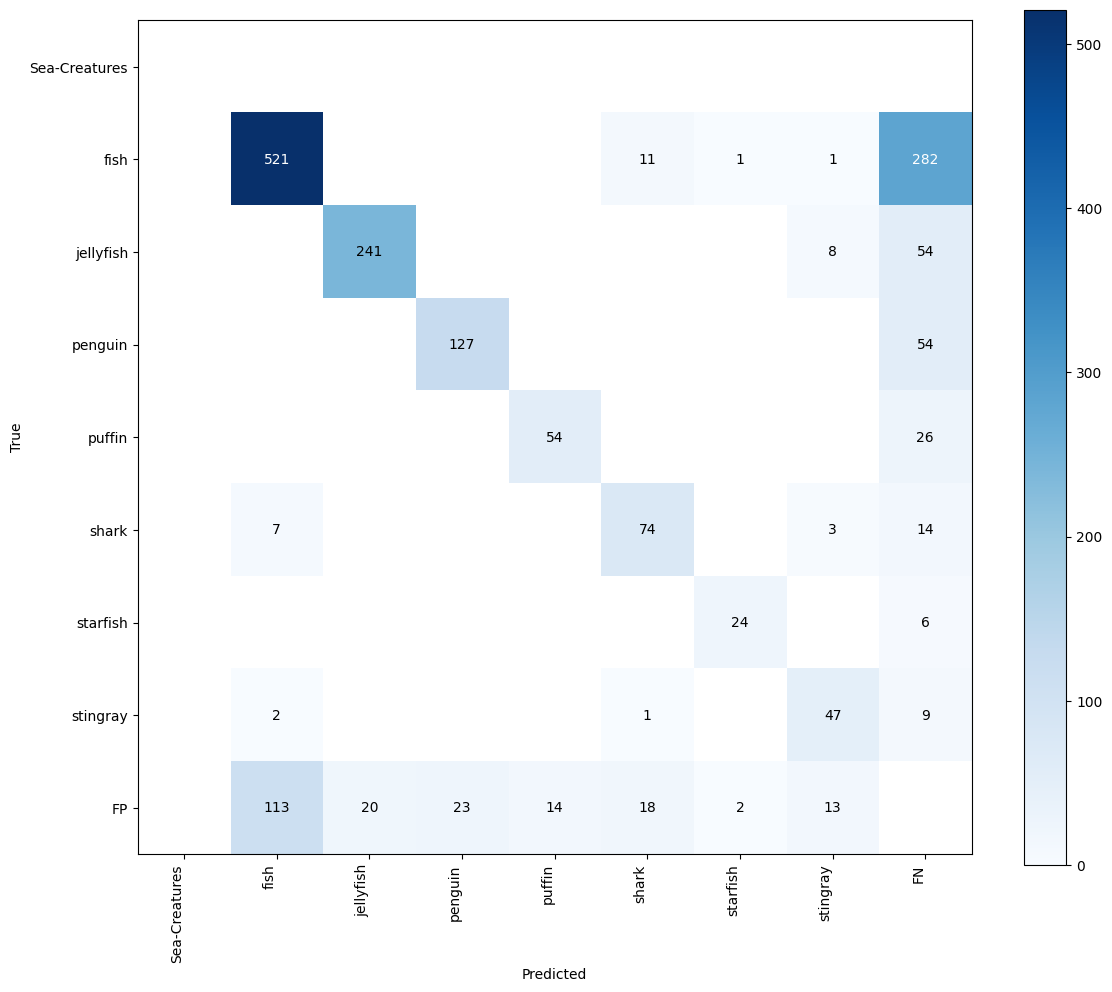

In [ ]:
import supervision as sv

# Assuming predictions, targets, and ds.classes are defined
# Example:
# predictions = [(xmin, ymin, xmax, ymax, class_id), ...]
# targets = [(xmin, ymin, xmax, ymax, class_id), ...]
# ds.classes = ["class_1", "class_2", ...]

# Create the confusion matrix from detections
confusion_matrix = sv.ConfusionMatrix.from_detections(
    predictions=predictions,
    targets=targets,
    classes=ds.classes
)

# Display the confusion matrix plot
confusion_matrix.plot()